In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.datasets import load_iris, make_moons, load_breast_cancer
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [3]:
# Data Loading, 2개 Class만 불러옴
iris = load_iris()
X = iris['data'][:,(2,3)]

In [4]:
# Scaling
scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

In [5]:
data = pd.DataFrame(data=Xstan, columns=['petal length','petal width'])
data['target'] = iris['target']
data = data[data['target']!=2] # Iris-setosa 와 Iris-Versicolor 에 대해 고려해보자
data.tail()

,petal length,petal width,target
95,0.251221,0.000878,1
96,0.251221,0.132510,1
97,0.308059,0.132510,1
98,-0.430828,-0.130755,1
99,0.194384,0.132510,1


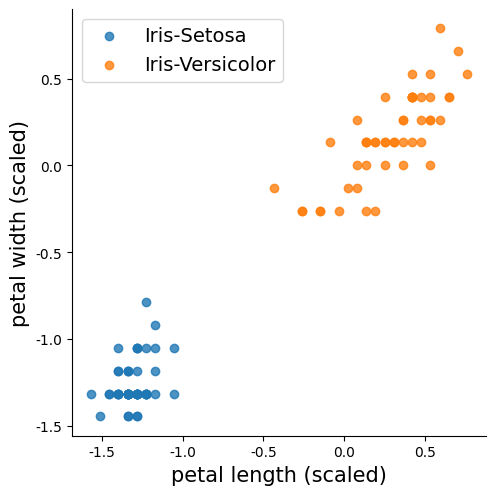

In [6]:
sns.lmplot(x='petal length',y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.legend(['Iris-Setosa','Iris-Versicolor'], fontsize = 14)
plt.xlabel('petal length (scaled)', fontsize = 15)
plt.ylabel('petal width (scaled)', fontsize = 15)
plt.show()

##[Linear Support Vector Machine Paramter]
   - Package : https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
   - penalty : L1, L2 중 어떤것으로 할 것인가
      - L2가 대게 주로 쓰임
   - C : Error에 대한 Penalty Term
      - C가 커지면 Hard Margin에 가까워지고, C가 작아지면 Soft Margin에 가까워짐



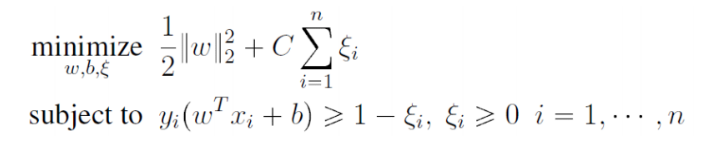

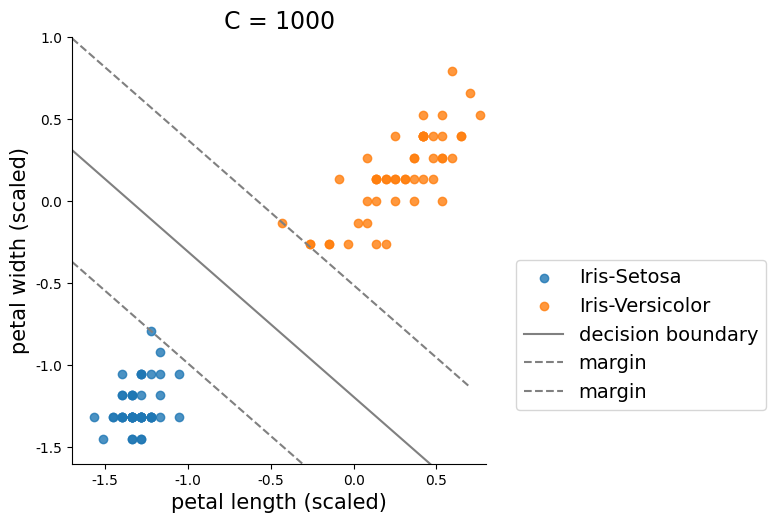

In [7]:
# Linear Hard Margin
# Large C : Margin안에 있는 오류에 대해 매우 큰 Penalty를 줌

C=1000
svc = LinearSVC(C=C,loss="hinge")
svc.fit(data[['petal length','petal width']].values,data['target'].values)

# 파라미터 (W, b) 도출하기
w0,w1 = svc.coef_[0]
b = svc.intercept_[0]

x0 = np.linspace(-1.7, 0.7, num=100)
# 결정 경계 (decision boundary) 도출하기
x1_decision = -b/w1 - w0/w1*x0

# +1 margin
x1_plus = x1_decision + 1/w1
# -1 margin
x1_minus = x1_decision - 1/w1

sns.lmplot(x='petal length',y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.plot(x0,x1_decision, color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey', linestyle='--')
plt.legend(['Iris-Setosa','Iris-Versicolor','decision boundary','margin','margin'], fontsize = 14, bbox_to_anchor=(1.05,0.5))
plt.xlabel('petal length (scaled)', fontsize = 15)
plt.ylabel('petal width (scaled)', fontsize = 15)
plt.title(f'C = {C}', fontsize = 17)
plt.ylim(-1.6,1)
plt.xlim(-1.7,0.8)
plt.show()

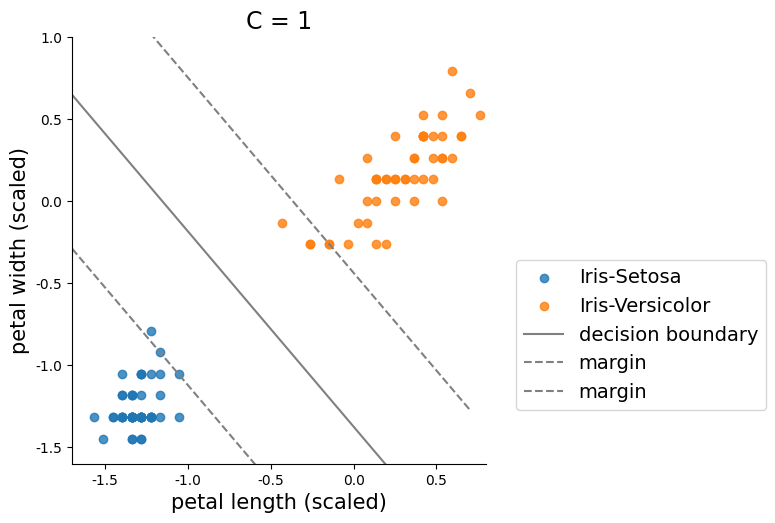

In [8]:
# Linear Soft
# Small C : Margin안에 있는 오류에 대해 작은 Penalty를 줌

C=1
svc = LinearSVC(C=C,loss="hinge")
svc.fit(data[['petal length','petal width']].values,data['target'].values)

# 파라미터 (W, b) 도출하기
w0,w1 = svc.coef_[0]
b = svc.intercept_[0]

x0 = np.linspace(-1.7, 0.7, num=100)
# 결정 경계 (decision boundary) 도출하기
x1_decision = -b/w1 - w0/w1*x0

# +1 margin
x1_plus = x1_decision + 1/w1
# -1 margin
x1_minus = x1_decision - 1/w1

sns.lmplot(x='petal length',y='petal width',hue='target',data=data, fit_reg=False, legend=False)
plt.plot(x0,x1_decision, color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey', linestyle='--')
plt.legend(['Iris-Setosa','Iris-Versicolor','decision boundary','margin','margin'], fontsize = 14, bbox_to_anchor=(1.05,0.5))
plt.xlabel('petal length (scaled)', fontsize = 15)
plt.ylabel('petal width (scaled)', fontsize = 15)
plt.title(f'C = {C}', fontsize = 17)
plt.ylim(-1.6,1)
plt.xlim(-1.7,0.8)
plt.show()

In [9]:
# fix random_state to make sure it produces the same dataset everytime. Remove it if you want randomized dataset.
X,y=make_moons(noise=0.1, random_state=2)
data = pd.DataFrame(data = X, columns=['x1','x2'])
data['y']=y
data.head()

,x1,x2,y
0,1.327241,-0.222425,1
1,-0.429116,1.071136,0
2,0.014901,0.003679,1
3,0.000352,1.087226,0
4,0.676553,0.857039,0


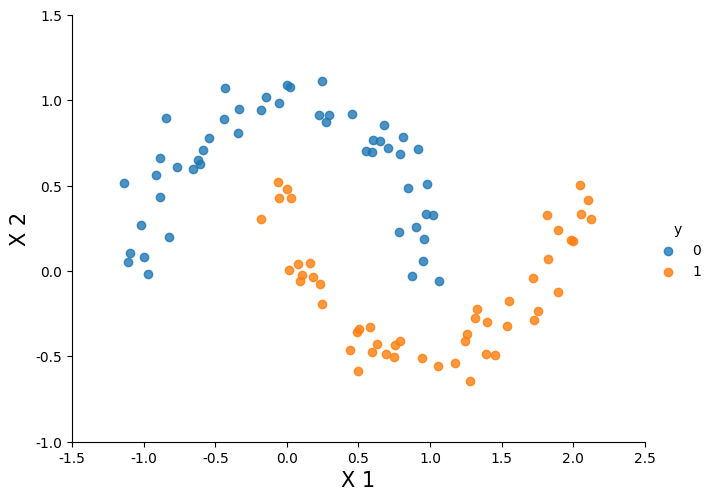

In [11]:
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, aspect=4/3)
plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5)
plt.xlabel('X 1', fontsize = 15)
plt.ylabel('X 2', fontsize = 15)
plt.show()

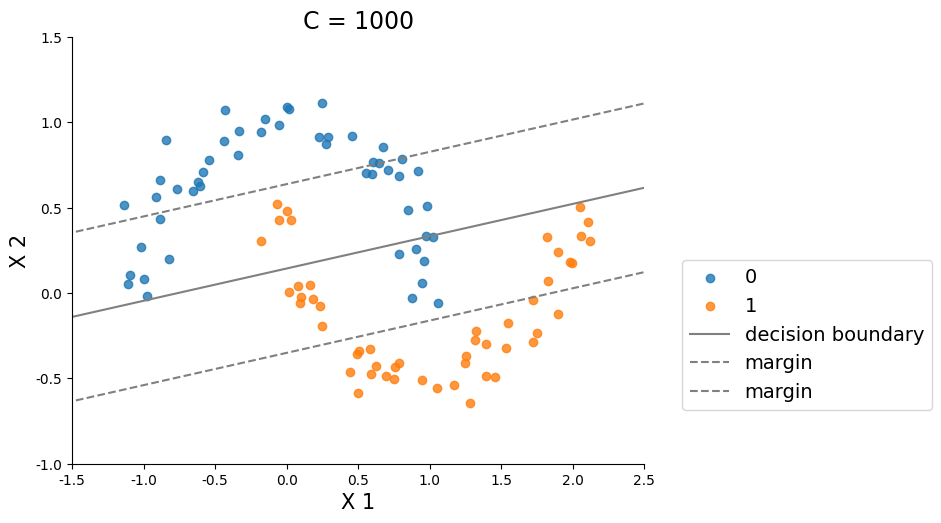

In [13]:
# Linear Hard to Non-liner Data

C=1000
svc = LinearSVC(C=C,loss="hinge")
svc.fit(data[['x1','x2']].values,data['y'].values)

# 파라미터 (W, b) 도출하기
w0,w1 = svc.coef_[0]
b = svc.intercept_[0]

# x0 = np.linspace(-1.7, 0.7, num=100)
x0 = np.linspace(-1.7, 2.7, num=100)
# 결정 경계 (decision boundary) 도출하기
x1_decision = -b/w1 - w0/w1*x0

# +1 margin
x1_plus = x1_decision + 1/w1
# -1 margin
x1_minus = x1_decision - 1/w1

sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=False, aspect=4/3)
plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5)
plt.plot(x0,x1_decision, color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey', linestyle='--')
plt.legend(['0','1','decision boundary','margin','margin'], fontsize = 14, bbox_to_anchor=(1.05,0.5))
plt.xlabel('X 1', fontsize = 15)
plt.ylabel('X 2', fontsize = 15)
plt.title(f'C = {C}', fontsize = 17)
# plt.ylim(-1.6,1)
# plt.xlim(-1.7,0.8)
plt.show()

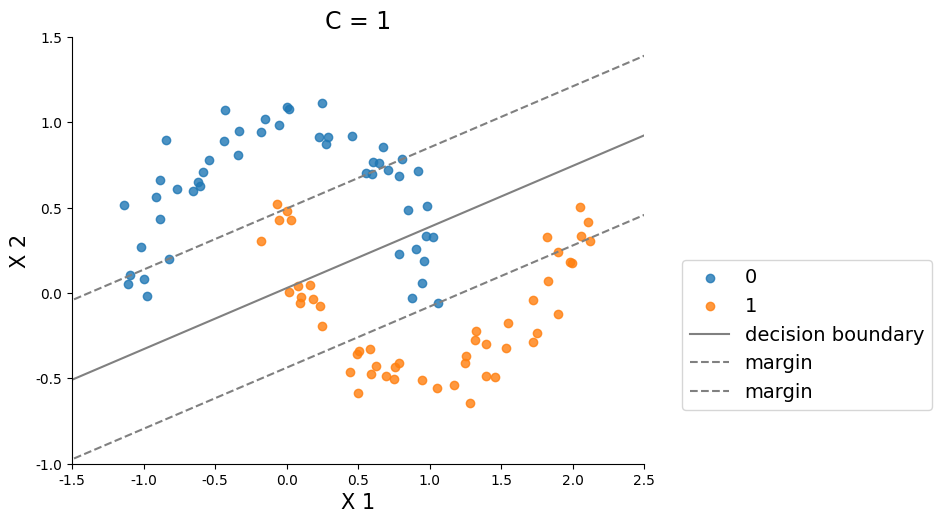

In [15]:
# Linear Soft to Non-liner Data

C=1
svc = LinearSVC(C=C,loss="hinge")
svc.fit(data[['x1','x2']].values,data['y'].values)

# 파라미터 (W, b) 도출하기
w0,w1 = svc.coef_[0]
b = svc.intercept_[0]

# x0 = np.linspace(-1.7, 0.7, num=100)
x0 = np.linspace(-1.7, 2.7, num=100)
# 결정 경계 (decision boundary) 도출하기
x1_decision = -b/w1 - w0/w1*x0

# +1 margin
x1_plus = x1_decision + 1/w1
# -1 margin
x1_minus = x1_decision - 1/w1

sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=False, aspect=4/3)
plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5)
plt.plot(x0,x1_decision, color='grey')
plt.plot(x0,x1_plus,x0,x1_minus,color='grey', linestyle='--')
plt.legend(['0','1','decision boundary','margin','margin'], fontsize = 14, bbox_to_anchor=(1.05,0.5))
plt.xlabel('X 1', fontsize = 15)
plt.ylabel('X 2', fontsize = 15)
plt.title(f'C = {C}', fontsize = 17)
# plt.ylim(-1.6,1)
# plt.xlim(-1.7,0.8)
plt.show()

## [Using Kernel]
   - Polynomial kernel

## [Support Vector Machine]
   - Package : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC
   - C : Error에 대한 Penalty Term
      - C가 커지면 Hard Margin에 가까워지고, C가 작아지면 Soft Margin에 가까워짐
   - Kernel : 어떤 종류의 Kernel을 사용해서 고차원으로 뿌릴 것 인가?
      - ‘linear’
      -  ‘poly’
      - ‘rbf’
      - ‘sigmoid’
      - ‘precomputed’
      - default = 'rbf'
   - degree : polynomial(ploy)를 얼마만큼의 고차원으로 뿌릴 것 인가?
      - 다른 Kernel은 지원하지 않음
   - gamma : rbf, poly, sigmoid의 degree를 의미함

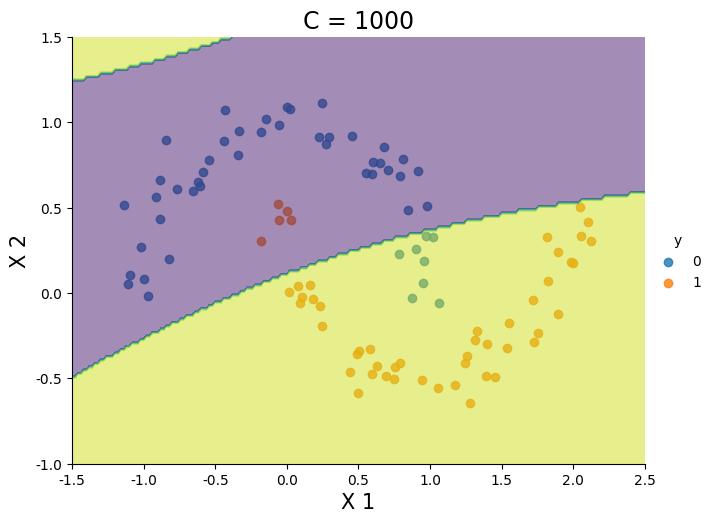

In [17]:
# Kernel = 'ploy'
# degree = 2

C=1000
scaler = StandardScaler()
Xstan = scaler.fit_transform(X)
svm_clf = SVC(kernel='poly', degree=2, C=C, coef0=1)
svm_clf.fit(Xstan,y)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# create grids
X0, X1 = X[:, 0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1)
# standardization on the grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridstan = scaler.transform(xgrid)

# prediction
Z = svm_clf.predict(xgridstan)
Z = Z.reshape(xx0.shape)

# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, aspect=4/3)
plt.contourf(xx0, xx1, Z, alpha=0.5)
plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5)
plt.xlabel('X 1', fontsize = 15)
plt.ylabel('X 2', fontsize = 15)
plt.title(f'C = {C}', fontsize = 17)
plt.show()

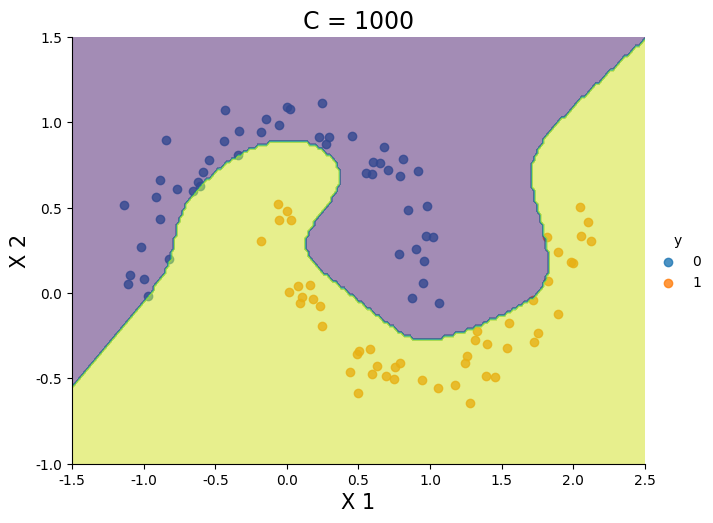

In [18]:
# Kernel = 'ploy'
# degree = 3

C=1000
scaler = StandardScaler()
Xstan = scaler.fit_transform(X)
svm_clf = SVC(kernel='poly', degree=20, C=C, coef0=1)
svm_clf.fit(Xstan,y)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# create grids
X0, X1 = X[:, 0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1)
# standardization on the grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridstan = scaler.transform(xgrid)

# prediction
Z = svm_clf.predict(xgridstan)
Z = Z.reshape(xx0.shape)

# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, aspect=4/3)
plt.contourf(xx0, xx1, Z, alpha=0.5)
plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5)
plt.xlabel('X 1', fontsize = 15)
plt.ylabel('X 2', fontsize = 15)
plt.title(f'C = {C}', fontsize = 17)
plt.show()

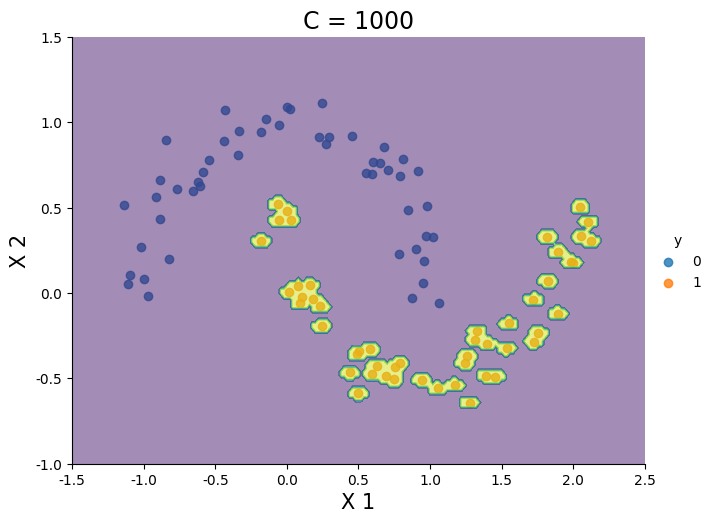

In [19]:
# Kernel = 'rbf'
# degree = 3

C=1000
scaler = StandardScaler()
Xstan = scaler.fit_transform(X)
svm_clf = SVC(kernel='rbf', gamma=1000, C=C, coef0=1)
svm_clf.fit(Xstan,y)

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# create grids
X0, X1 = X[:, 0], X[:, 1]
xx0, xx1 = make_meshgrid(X0, X1)
# standardization on the grids
xgrid = np.c_[xx0.ravel(), xx1.ravel()]
xgridstan = scaler.transform(xgrid)

# prediction
Z = svm_clf.predict(xgridstan)
Z = Z.reshape(xx0.shape)

# plotting prediction contours - decision boundary (Z=0), and two margins (Z = 1 or -1)
sns.lmplot(x='x1',y='x2',hue='y',data=data, fit_reg=False, legend=True, aspect=4/3)
plt.contourf(xx0, xx1, Z, alpha=0.5)
plt.xlim(-1.5,2.5)
plt.ylim(-1,1.5)
plt.xlabel('X 1', fontsize = 15)
plt.ylabel('X 2', fontsize = 15)
plt.title(f'C = {C}', fontsize = 17)
plt.show()

## [One-Class Support Vector Machine]
   - Package : https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html
   - nu : Error 개수에 대한 parameter
      - nu이 커지면 커질수록 Abnormal 개수가 증가하고 nu이 작아지면 abnormal 개수가 줄어듬
      - 0 ~ 1 값을 가짐
      - default=0.5
   - Kernel : 어떤 종류의 Kernel을 사용해서 고차원으로 뿌릴 것 인가?
      - ‘linear’
      -  ‘poly’
      - ‘rbf’
      - ‘sigmoid’
      - ‘precomputed’
      - default = 'rbf'
   - degree : polynomial(ploy)를 얼마만큼의 고차원으로 뿌릴 것 인가?
      - 다른 Kernel은 지원하지 않음
   - gamma : rbf, poly, sigmoid의 degree를 의미함

In [20]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185329 sha256=aa69fb0d10fe9356a72a6ec6d318ea90d846a45984a86af820b8c4559cb4965d
  Stored in directory: /root/.cache/pip/wheels/36/8e/e2/e932956b10b843eb6be9eefa70b5c1bee7b561be14c423b136
Successfully built pyod


Text(0.5, 1.0, 'Ground Truth')

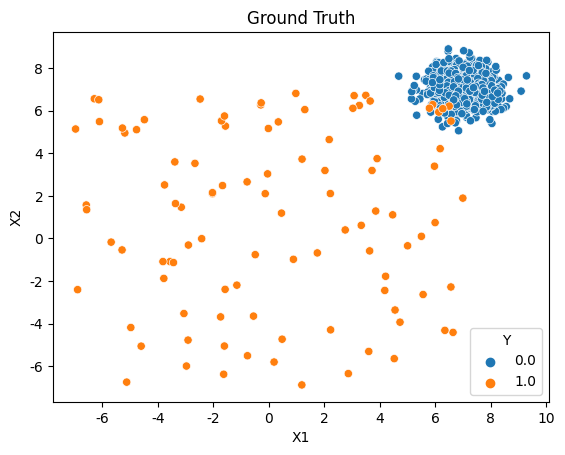

In [21]:
from pyod.utils.data import generate_data, get_outliers_inliers
from sklearn.svm import OneClassSVM
# Data Loading
X, Y = generate_data(behaviour='new', n_features=10,
                     train_only=True,
                     contamination=0.1,
                     random_state=2023)
# Naming for columns
col_list = []
for i in range(X.shape[1]):
    a = 'X{}'.format(i+1)
    col_list.append(a)
# Make DF
df = pd.DataFrame(X, columns = col_list)
df['Y'] = Y
# Data 분포 확인하기 X1, X2
sns.scatterplot(x='X1', y='X2', hue='Y', data=df);
plt.title('Ground Truth')

In [22]:
# OCSVM Setup
OCSVM = OneClassSVM(nu=0.01, kernel = 'poly', gamma = 1)
OCSVM.fit(df[['X1', 'X2']])
y_pred = OCSVM.predict(df[['X1', 'X2']])

In [23]:
for i in range(y_pred.shape[0]):
    if y_pred[i] == 1:
        y_pred[i] = 0
    else:
        y_pred[i] = 1
n_errors = (y_pred != df['Y']).sum()

In [24]:
# Anomaly Score
X_scores = OCSVM.score_samples(df[['X1', 'X2']])

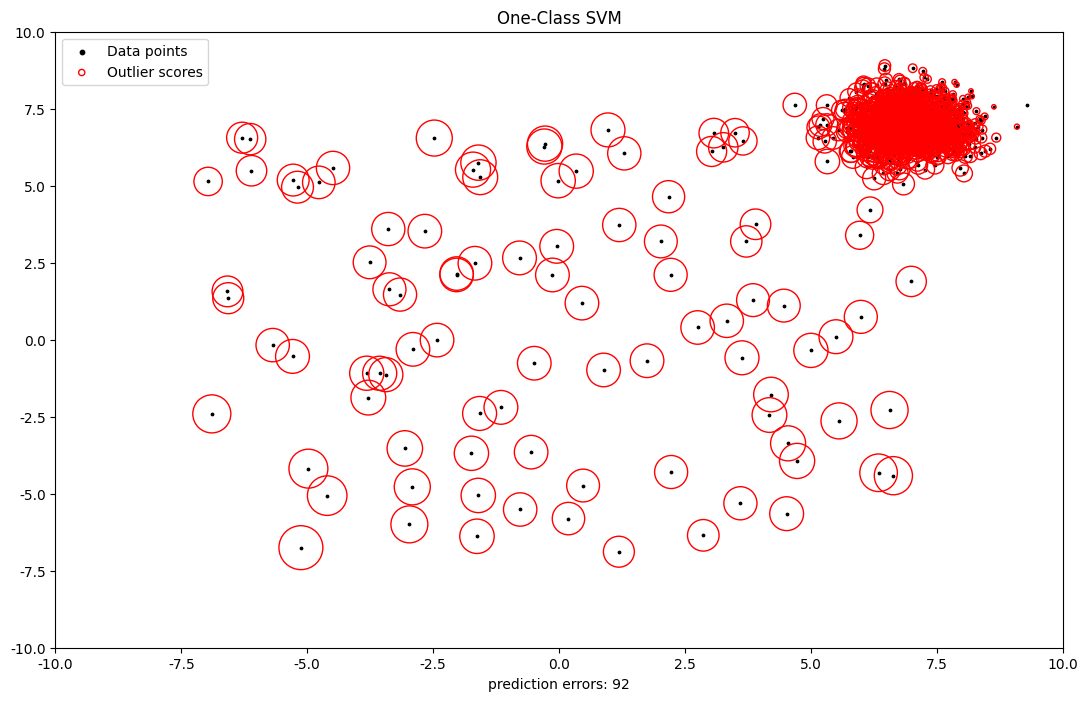

In [25]:
plt.figure(figsize=(13,8))
plt.title("One-Class SVM")
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
    df.iloc[:, 0],
    df.iloc[:, 1],
    s=1000 * radius**2,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores",
)
plt.axis("tight")
plt.xlim((-10, 10))
plt.ylim((-10, 10))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()

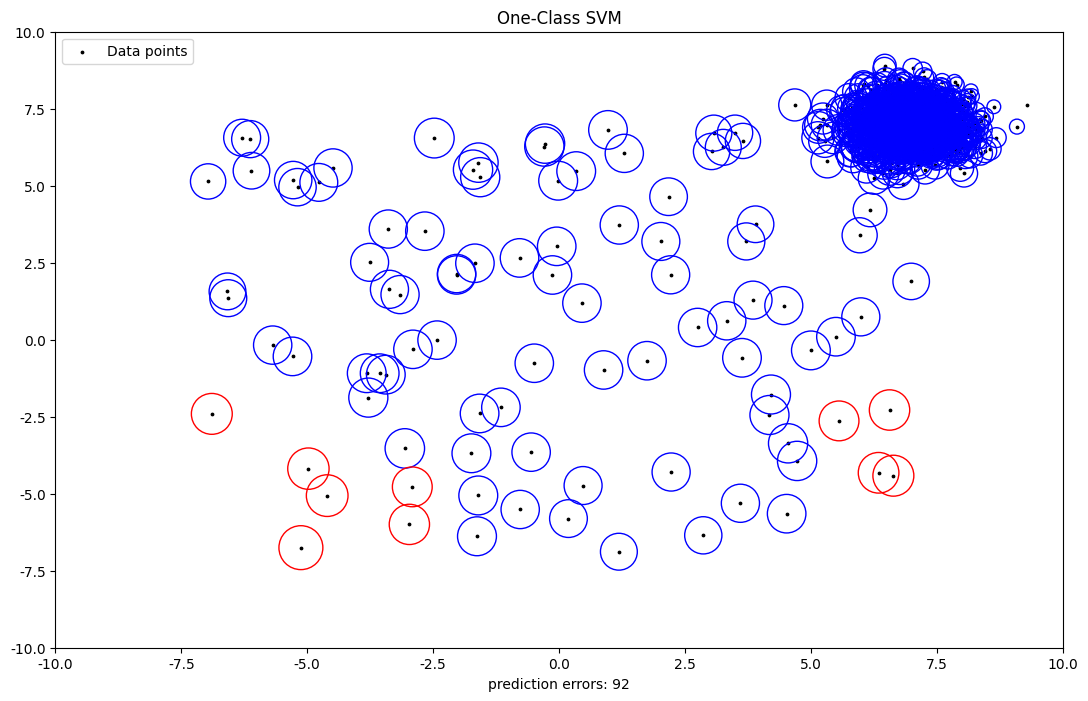

In [26]:
plt.figure(figsize=(13,8))
plt.title("One-Class SVM")
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min()) # MinMax Scale

for i in range(df.shape[0]):
    if radius[i] >= np.percentile(radius, 99):
            plt.scatter(
            df.iloc[i, 0],
            df.iloc[i, 1],
            s=1000 * radius[i],
            edgecolors="r",
            facecolors="none",
            #label="Outlier scores",
        )
    elif radius[i] < np.percentile(radius, 99):
            plt.scatter(
            df.iloc[i, 0],
            df.iloc[i, 1],
            s=1000 * radius[i],
            edgecolors="b",
            facecolors="none",
            #label="Outlier scores",
        )

plt.axis("tight")
plt.xlim((-10, 10))
plt.ylim((-10, 10))
plt.xlabel("prediction errors: %d" % (n_errors))
legend = plt.legend(loc="upper left")
#legend.legendHandles[0]._sizes = [10]
#legend.legendHandles[1]._sizes = [20]
plt.show()

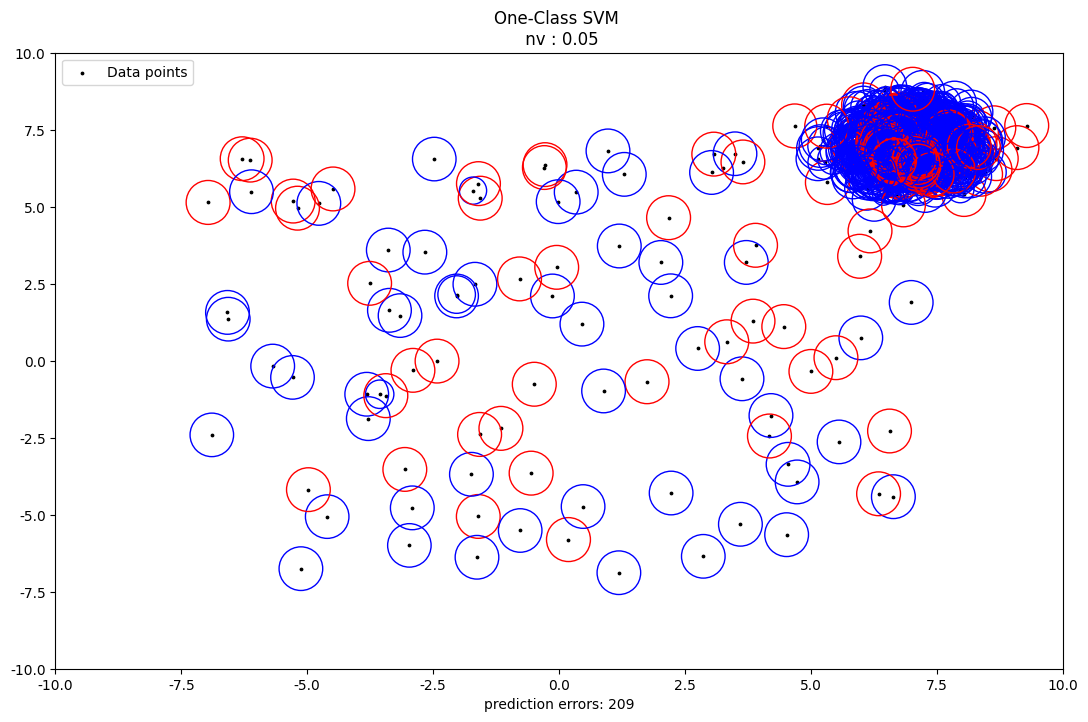

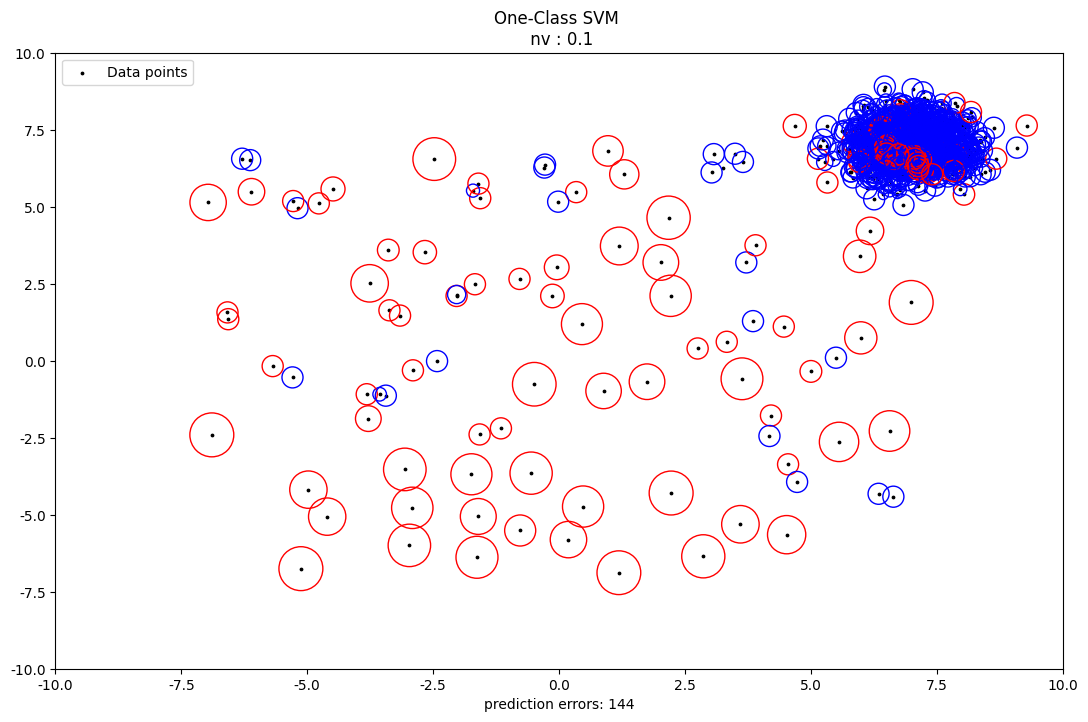

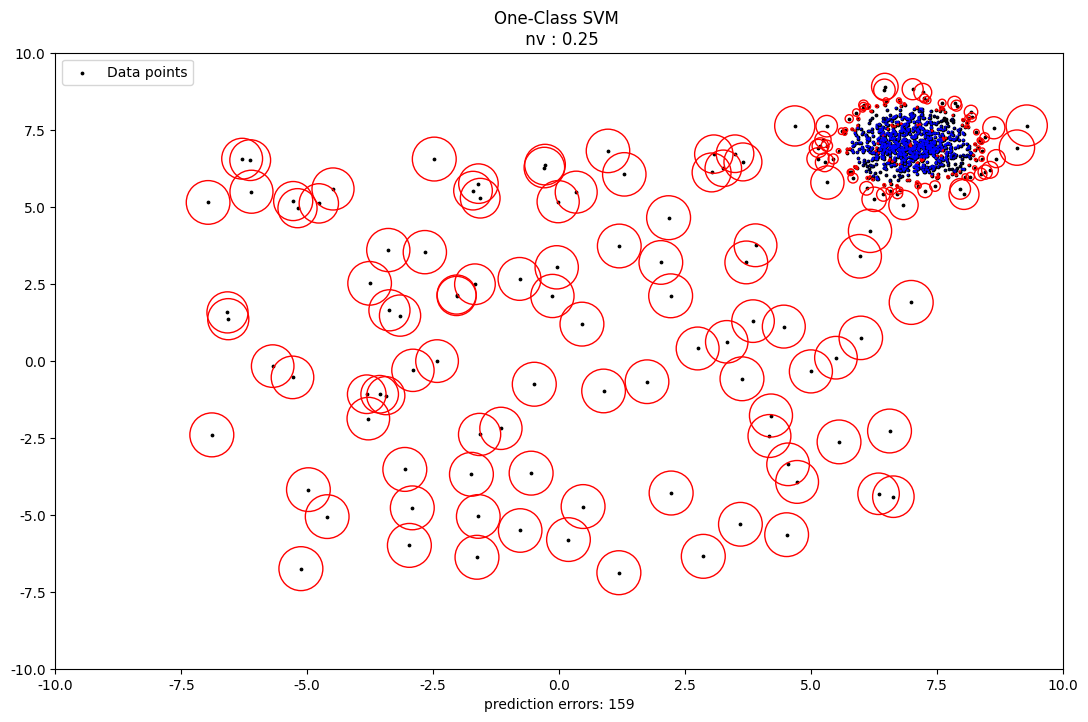

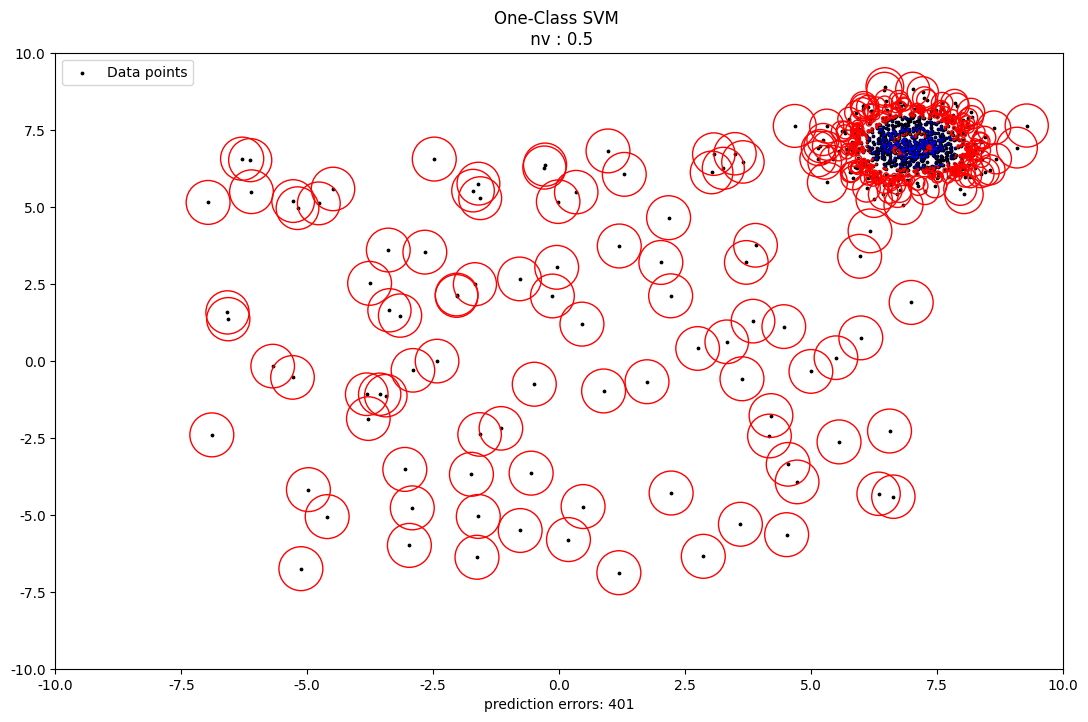

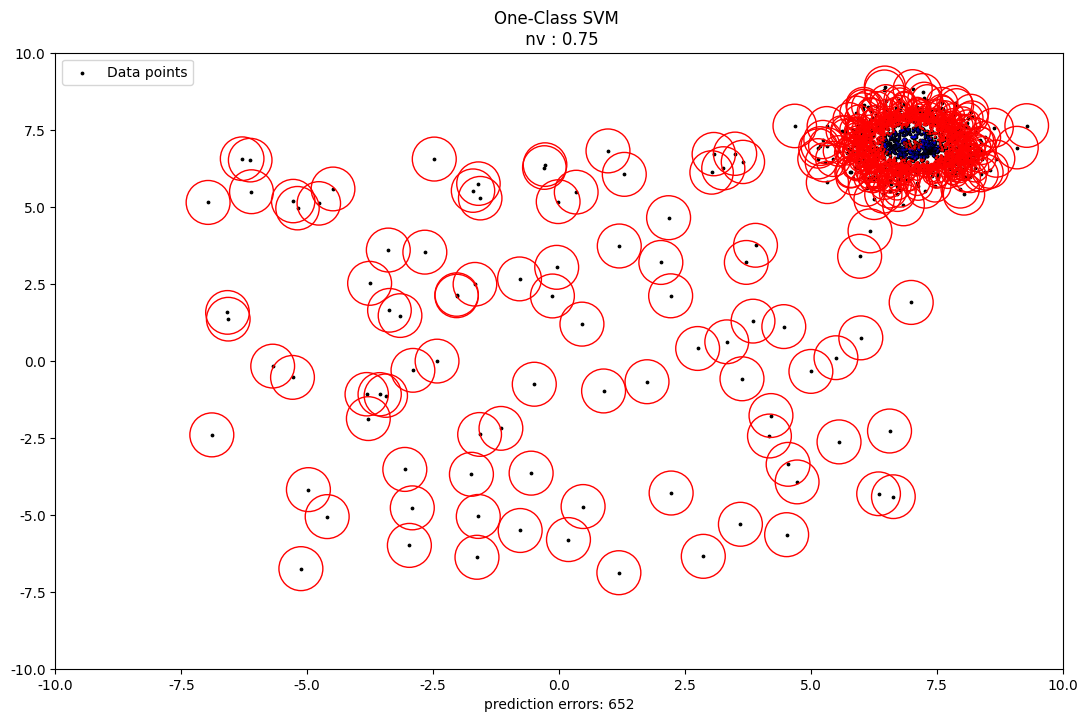

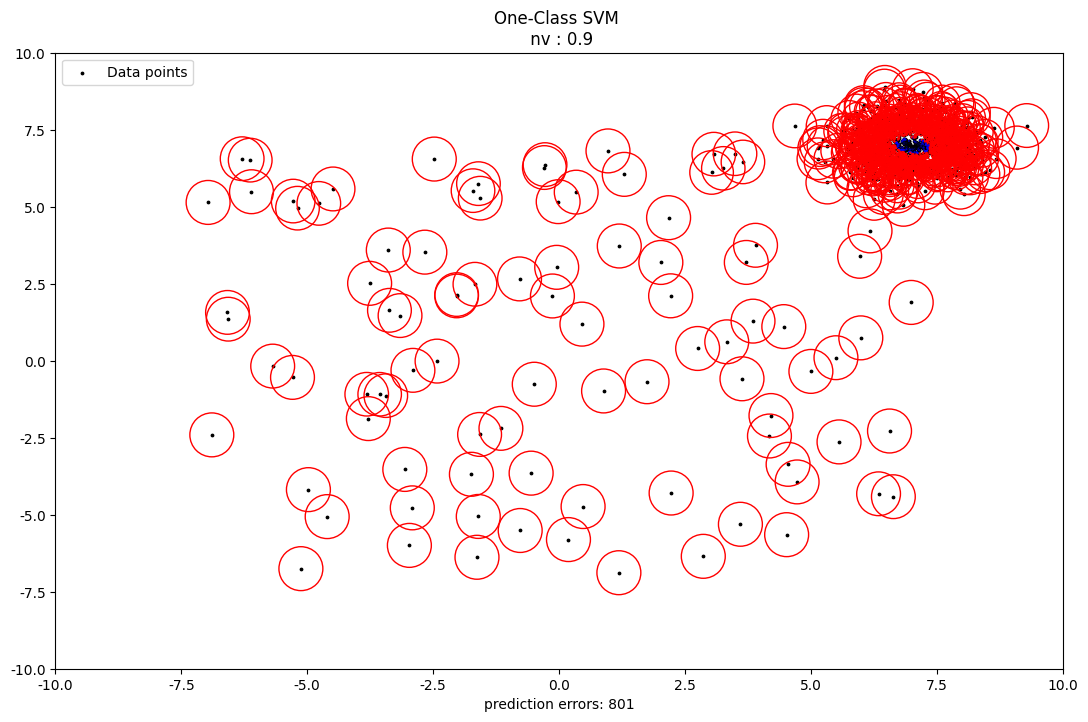

In [27]:
param = [0.05, 0.1, 0.25, 0.5, 0.75, 0.9]
for n in param:
    # OCSVM Setup
    OCSVM = OneClassSVM(nu=n, kernel = 'rbf', gamma = 3)
    OCSVM.fit(df[['X1', 'X2']])
    y_pred = OCSVM.predict(df[['X1', 'X2']])
    for i in range(y_pred.shape[0]):
        if y_pred[i] == 1:
            y_pred[i] = 0
        else:
            y_pred[i] = 1
    n_errors = (y_pred != df['Y']).sum()
    # Anomaly Score
    X_scores = OCSVM.score_samples(df[['X1', 'X2']])

    plt.figure(figsize=(13,8))
    plt.title("One-Class SVM \n nv : {}".format(n))
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color="k", s=3.0, label="Data points")
    # plot circles with radius proportional to the outlier scores
    radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min()) # MinMax Scale

    for i in range(df.shape[0]):
        if y_pred[i] == 1:
                plt.scatter(
                df.iloc[i, 0],
                df.iloc[i, 1],
                s=1000 * radius[i]**2,
                edgecolors="r",
                facecolors="none",
                #label="Outlier scores",
            )
        elif y_pred[i] == 0:
                plt.scatter(
                df.iloc[i, 0],
                df.iloc[i, 1],
                s=1000 * radius[i]**2,
                edgecolors="b",
                facecolors="none",
                #label="Outlier scores",
            )

    plt.axis("tight")
    plt.xlim((-10, 10))
    plt.ylim((-10, 10))
    plt.xlabel("prediction errors: %d" % (n_errors))
    legend = plt.legend(loc="upper left")
    #legend.legendHandles[0]._sizes = [10]
    #legend.legendHandles[1]._sizes = [20]
    plt.show()